https://public.tableau.com/views/DashboardM2_17346232889160/Dashboard1?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

'''
Graded Challenge 5

Nama  : Muhammad Aji Syahbana
Batch : CODA-RMT-002

Program ini dibuat untuk melatihkemampuan pengolahan data dan analisa data

'''

In [19]:
import pandas as pd #library data analysis dan data manpulasi, untuk pengelolaan dataset
import numpy as np #library untuk komputasi numerik
import matplotlib.pyplot as plt #library untuk mem-visualkan data
import tensorflow as tf  #train models
import seaborn as sns #membantu membuat grafik stastistik
import itertools #Untuk membuat iterator yang bekerja pada item dari sebuah urutan
import re #Untuk operasi ekspresi reguler, berguna untuk pemrosesan teks
import string #Untuk manipulasi string, terutama penghapusan tanda baca
import nltk #Natural Language Toolkit, pustaka untuk analisis dan pemrosesan teks
from nltk.corpus import stopwords #Untuk mengakses daftar kata stopword dalam berbagai bahasa
from wordcloud import WordCloud, STOPWORDS #Untuk menghasilkan word cloud dan menangani stopword
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc # Untuk evaluasi model
from collections import Counter #Untuk menghitung frekuensi elemen dalam sebuah daftar
import os #Untuk berinteraksi dengan sistem operasi (misalnya membaca file)
from sklearn.ensemble import RandomForestClassifier #membuat model klasifikasi berbasis Random Forest.
from sklearn.model_selection import train_test_split #membagi dataset menjadi data pelatihan dan pengujian.
from scipy.stats import ttest_ind #melakukan uji t-test independent
from scipy.stats import pearsonr #untuk menghitung koefisien korelasi Pearson dan nilai p-value antara dua variabel.
from sklearn.linear_model import LinearRegression #untuk membangun model regresi linear.

# Problem statement: mencari tahu keberadaan buzzer atau bot pada postingan twitter untuk tiga kandidat pilpres 2024, pada rentang waktu 2019 - April 2023


# SMART:





S: Mengidentifikasi dan menganalisa aktivitas terduga buzzer/bot pada aplikasi X/Twiiter dalam rangkaian pelaksanaan pilpres 2024

M: identifikasi kata yang paling sering digunakan dan pola leberandaan komando teroganisir maupun pola-bot pada komentar yang muncul untuk masing-masing kandidat

A: visual data pola waktu posting, statistik data terduga keberadaaan buzzer(following-followers; perbedaan jumlah posting terduga dan tidak terduga), visual data jumlah komentar positif dan negatif, visual data kata yang paling banyak muncul pada komen negatif dan visual data yang paling banyak muncul pada komen positif

R: Memberikan informasi tentang sentiment publik terhadap 3 kandidat presiden

T: Insight didapat dalam waktu 7 hari semenjak announcement penyelesaian

Key Question:

What: Apa kata yang paling sering muncul pada postingan twitter terkait kandidat pilpres 2024?

When: Kapan puncak postingan mengenai ketiga kandidat terjadi?

Where: Dimana data diambil?

Who: Siapa nama kandidat yang paling banyak disebut?

Why: Kenapa ada indikasi kandidat menggunakan bot atau buzzer?

How: Bagaimana pola waktu postingan yang mengindikasikan adanya buzzer atau bot?


# Data Loading

In [20]:
anies_data = pd.read_csv('/content/Anies Baswedan.csv')
prabowo_data = pd.read_csv('/content/Ganjar Pranowo.csv')
ganjar_data = pd.read_csv('/content/Prabowo Subianto.csv')

In [21]:
#combine data into one
df = pd.concat([
    anies_data.assign(Candidate='Anies Baswedan'),
    prabowo_data.assign(Candidate='Prabowo Subianto'),
    ganjar_data.assign(Candidate='Ganjar Pranowo')
])

# Data Cleaning

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0.1    20000 non-null  float64
 1    Date           30000 non-null  object 
 2    Created        30000 non-null  object 
 3    User ID        30000 non-null  float64
 4    Followers      30000 non-null  int64  
 5    Following      30000 non-null  int64  
 6    Tweet Count    30000 non-null  int64  
 7    TweetLocation  13805 non-null  object 
 8   Text            29731 non-null  object 
 9   label           29997 non-null  object 
 10  Candidate       30000 non-null  object 
 11  Unnamed: 0      10000 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 3.0+ MB


Data telah berhasil disatukan ke dalam satu dataframe, total terdapat 30000 data 12 kolom. kolom TweetLocation, Text dan Label, mengandung *missing value*

In [23]:
df.tail() #memastikan telah menjadi satu file

,Unnamed: 0.1,Date,Created,User ID,Followers,Following,Tweet Count,TweetLocation,Text,label,Candidate,Unnamed: 0
9995,9995.0,2022-12-08 08:32:40+00:00,2016-09-30 15:25:40+00:00,7.820000e+17,50,104,4398,"East Kalimantan, Indonesia","sir, if the community always goes down, it wil...",Positive,Ganjar Pranowo,NaN
9996,9996.0,2022-12-08 08:26:00+00:00,2022-11-07 06:41:27+00:00,1.590000e+18,23,122,131,Yogyakarta,"young prabowo is really cool, bismillah sir, g...",Positive,Ganjar Pranowo,NaN
9997,9997.0,2022-12-08 08:06:00+00:00,2022-12-01 13:23:45+00:00,1.600000e+18,11,3,67,Surabaya,"basically, prabowo is great and was chosen as ...",Positive,Ganjar Pranowo,NaN
9998,9998.0,2022-12-08 08:05:00+00:00,2022-12-02 02:44:35+00:00,1.600000e+18,50,83,103,NaN,optimistic about being the best figure in the ...,Positive,Ganjar Pranowo,NaN
9999,9999.0,2022-12-08 07:56:00+00:00,2022-11-07 06:41:27+00:00,1.590000e+18,23,122,131,Yogyakarta,"the best presidential candidate, god willing, ...",Positive,Ganjar Pranowo,NaN


In [24]:
df.head() #memastikan telah menjadi satu file

,Unnamed: 0.1,Date,Created,User ID,Followers,Following,Tweet Count,TweetLocation,Text,label,Candidate,Unnamed: 0
0,0.0,2023-04-16 10:04:35+00:00,2023-03-27 08:59:57+00:00,1.640000e+18,981,531,22,NaN,anies president info,Positive,Anies Baswedan,NaN
1,1.0,2023-04-16 10:00:01+00:00,2012-08-21 07:34:04+00:00,7.710306e+08,10702,123,30121,"Palmerah, Jakarta",gerindra party politician sandiaga uno answers...,Positive,Anies Baswedan,NaN
2,2.0,2023-04-16 09:14:46+00:00,2011-09-27 05:22:24+00:00,3.807551e+08,11,35,230,North Jakarta,"mr. anies continued, we will guard him until h...",Positive,Anies Baswedan,NaN
3,3.0,2023-04-16 07:03:05+00:00,2017-10-19 12:32:28+00:00,9.210000e+17,37,47,2670,Jakarta,may allah swt save the nation and state of the...,Positive,Anies Baswedan,NaN
4,4.0,2023-04-16 06:03:59+00:00,2022-06-28 07:03:37+00:00,1.540000e+18,6,129,766,"Lebak, Banten","poor chotimah, uncle anies, that's why my fami...",Positive,Anies Baswedan,NaN


**Feature Definition**

1. Unnamed: 0.1: kolom identitas dari entri, digunakan sebagai kode unik.

2. Date: kolom berisikan informasi kapan data di-input

3. User ID: kolom berisikan informasi mengenai kode unik dari masing-masing aku yang membuat twit

4. Created: menginformasikan kapan twit tersebut dibuat

5. Followers: menginformasikan jumlah pengikut dari akun yang memposting twit, dapat digunakan sebagai landasan analisa status aktif akun

6. Following: menginformasikan jumlah pyang diikuti dari akun yang memposting twit, dapat digunakan sebagai landasan analisa status aktif akun

7. Tweet Count: menginformasikan jumlah twit yang pernah dibuat oleh akun

8. TweetLocation: data lokasi sayang akun mem-posting twit pada text

9. Text: full narasi twit yang dipost

10. label: sentimen dari twit yang dibuat pada kandidat

11. candiate: berisikan informasi nama kandidat pilpres 2024 yang terkait dengan twit yang dibuat

12. unnamed0: unknown column

In [25]:
df.columns = df.columns.str.strip() #strip space pada nama kolom
print("Columns after stripping whitespace:", df.columns.tolist()) #menampilkan data nama kolom yang telah diperbaiki

Columns after stripping whitespace: ['Unnamed: 0.1', 'Date', 'Created', 'User ID', 'Followers', 'Following', 'Tweet Count', 'TweetLocation', 'Text', 'label', 'Candidate', 'Unnamed: 0']


In [26]:
df = df.loc[:, ['Unnamed: 0.1', 'Created', 'Followers', 'User ID', 'Following', 'Tweet Count', 'TweetLocation', 'Text', 'label', 'Candidate']] #men-sortir kolom yang hendak digunakan

In [27]:
df.head() #verifikasi singkat hasil pengambilan kolom yang hendak digunakan

,Unnamed: 0.1,Created,Followers,User ID,Following,Tweet Count,TweetLocation,Text,label,Candidate
0,0.0,2023-03-27 08:59:57+00:00,981,1.640000e+18,531,22,NaN,anies president info,Positive,Anies Baswedan
1,1.0,2012-08-21 07:34:04+00:00,10702,7.710306e+08,123,30121,"Palmerah, Jakarta",gerindra party politician sandiaga uno answers...,Positive,Anies Baswedan
2,2.0,2011-09-27 05:22:24+00:00,11,3.807551e+08,35,230,North Jakarta,"mr. anies continued, we will guard him until h...",Positive,Anies Baswedan
3,3.0,2017-10-19 12:32:28+00:00,37,9.210000e+17,47,2670,Jakarta,may allah swt save the nation and state of the...,Positive,Anies Baswedan
4,4.0,2022-06-28 07:03:37+00:00,6,1.540000e+18,129,766,"Lebak, Banten","poor chotimah, uncle anies, that's why my fami...",Positive,Anies Baswedan


In [28]:
df = df.drop_duplicates() #drop duplikasi data

In [29]:
df['Created'] = pd.to_datetime(df['Created'], utc=True, format='ISO8601')
df =  df.dropna(subset=['Created'])
start_date = '2019-01-01'
end_date = '2024-12-31'
df = df[(df['Created'] >= start_date) & (df['Created'] <= end_date)]

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21066 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   Unnamed: 0.1   14505 non-null  float64            
 1   Created        21066 non-null  datetime64[ns, UTC]
 2   Followers      21066 non-null  int64              
 3   User ID        21066 non-null  float64            
 4   Following      21066 non-null  int64              
 5   Tweet Count    21066 non-null  int64              
 6   TweetLocation  8047 non-null   object             
 7   Text           20920 non-null  object             
 8   label          21066 non-null  object             
 9   Candidate      21066 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(3), object(4)
memory usage: 1.8+ MB


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21066 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   Unnamed: 0.1   14505 non-null  float64            
 1   Created        21066 non-null  datetime64[ns, UTC]
 2   Followers      21066 non-null  int64              
 3   User ID        21066 non-null  float64            
 4   Following      21066 non-null  int64              
 5   Tweet Count    21066 non-null  int64              
 6   TweetLocation  8047 non-null   object             
 7   Text           20920 non-null  object             
 8   label          21066 non-null  object             
 9   Candidate      21066 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(3), object(4)
memory usage: 1.8+ MB


# Pembersihan Text

In [32]:
def strip_all_entities(text):
    text = text.replace('\r', '').replace('\n', ' ').replace('\n', ' ').lower() #menghilangkan \n and \r and huruf kecil
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #menghapus link dan mention
    text = re.sub(r'[^\x00-\x7f]',r'', text) #menghapus karakter non utf8/ascii seperti '\x9a\x91\x97\x9a\x97'
    banned_list= string.punctuation + 'Ã'+'±'+'ã'+'¼'+'â'+'»'+'§'
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    return text

#membersihkan hashtags pada akhir kalimat dan membiarkan pada tengah kalimat namun menghapus simbol '#'
def clean_hashtags(tweet):
    new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet)) #Menghapus hashtag pada akhir kalimat
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet)) #membiarkan kalimat hashtag di tengah kalimat, serta menghapus simbol '#'
    return new_tweet2

#menyaring karakter spesial seperti & and $
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

#Menghilangkan multi spasi
def remove_mult_spaces(text):
    return re.sub("\s\s+" , " ", text)

#handle non-string
def strip_all_entities(text):
    if not isinstance(text, str):
        text = str(text)
    text = text.replace('\r', '').replace('\n', ' ').replace('\t', ' ').lower()
    text = re.sub(r"(?:@\S+|https?://\S+)", "", text)
    text = re.sub(r'[^\x00-\x7F]', '', text)
    banned_list = string.punctuation + 'ÄäÜüÖöß'
    return text

text_new = []
for t in df.Text:
    text_new.append(remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(t)))))

df['clean_text'] = text_new

stopwords_baru = ['anies', 'baswedan', 'rasyid', 'prabowo', 'subianto', 'ganjar', 'pranowo', 'jokowi', 'presiden', 'president', 'presidential', 'republic','allah', 'candidate', 'said', 'pak',
                  'indonesia', 'god', 'willing', 'will', 'change', 'now', 'saudi', 'saewad', 'mr', 'park', 'jimin', 'idha',
                  'jin', 'hyung', 'romance', 'didu', 'election', 'anie', 'soul', 'mate', 'become', 'people', 'ferry', 'irawan', 'venna', 'melinda', 'lee', 'zee', 'jia', 'village', 'head',
                  'depok', 'resign', 'rungkad', 'pssi', 'eliezer', 'ginting', 'axelsen', 'open', 'rajab', 'wr', 'year', 'still', 'dont', 'ri', 'arema', 'po', 'kdrt', 'jokowis', 'liga',
                  'fajri', 'want', 'mojok', 'hakim', 'pacitan', 'zii', 'kidult', 'morning', 'asnawi', 'doesnt', 'kunlavut', 'gangar', 'pranowos', 'subiantos', 'muhammad', 'fahnoor', 'theres', 'remain', 'koran']

def remove_stop_words(text):
    if pd.isna(text):
        return text  #jika text adalah NaN, makan di di-return

    # Hapus tanda baca dan ubah ke huruf kecil untuk konsistensi
    text = text.translate(str.maketrans('', '', string.punctuation)).lower()  #menghilangkan tanda baca dan merubah menjadi huruf kecil

    words = text.split()  #memfilter kata-kata dalam teks dan
    filtered_words = [word for word in words if word not in stopwords_baru]  #menghilangkan kata-kata yang tidak penting atau umum

    return " ".join(filtered_words)  #menggabungkan daftar kata-kata yang telah difilter (filtered_words) menjadi sebuah string tunggal dengan spasi sebagai pemisah

# pengaplikasian function ke dataframe
df['Text'] = df['Text'].apply(lambda x: remove_stop_words(x))

In [33]:
df.head() #verifikasi ulang hasil pembersihan kolom text

,Unnamed: 0.1,Created,Followers,User ID,Following,Tweet Count,TweetLocation,Text,label,Candidate,clean_text
0,0.0,2023-03-27 08:59:57+00:00,981,1.640000e+18,531,22,NaN,info,Positive,Anies Baswedan,anies president info
4,4.0,2022-06-28 07:03:37+00:00,6,1.540000e+18,129,766,"Lebak, Banten",poor chotimah uncle thats why my family has de...,Positive,Anies Baswedan,"poor chotimah, uncle anies, that's why my fami..."
18,18.0,2021-08-03 09:08:15+00:00,293,1.420000e+18,222,2099,NaN,smart herianto is very suitable for the of the of,Positive,Anies Baswedan,smart herianto anies is very suitable for the ...
19,19.0,2022-06-30 09:51:34+00:00,10361,1.540000e+18,8231,1404,"East Kalimantan, Indonesia",you are so busy managing our baswed and the tr...,Positive,Anies Baswedan,you are so busy managing our presidential cand...
20,20.0,2019-08-25 12:05:23+00:00,106,1.170000e+18,210,5725,NaN,id bang,Positive,Anies Baswedan,"id, god willing, bang anies will become president"


In [34]:
df.to_csv('cleaned_data.csv') #export dataFrame ke csv

# Exploratory Data Analysis (EDA)

In [35]:
candidate_label = df.groupby(['Candidate', 'label']).size().unstack(fill_value=0) #pengelompokkan dan perhitungan label berdasarkan kandidat
#menghitung total positif dan negatif
positif = candidate_label['Positive']
negatif = candidate_label['Negative']
#menghitung presentase
perc_positif = (positif / (negatif + positif) *100).round(1)
perc_negatif = (negatif / (negatif + positif) *100).round(1)
#persentase total
total_positif = positif.sum()
total_negatif = negatif.sum()
total_perc_positif = (total_positif / (total_positif + total_negatif) * 100).round(1)
total_perc_negatif = (total_negatif / (total_positif + total_negatif) * 100).round(1)
#penggabungan hasil
df_p = pd.concat([positif, negatif, perc_positif, perc_negatif], axis=1)
df_p.columns = ['Positive', 'Negative', 'Persentase Positif', 'Persentase Negatif']
df_p.loc['Total'] = [total_positif, total_negatif, total_perc_positif, total_perc_negatif] #menambahkan row untuk total

In [36]:
df_p #pengecekan hasil pembuatan perhitungan label

,Positive,Negative,Persentase Positif,Persentase Negatif
Candidate,,,,
Anies Baswedan,4623.0,2573.0,64.2,35.8
Ganjar Pranowo,5432.0,1877.0,74.3,25.7
Prabowo Subianto,5141.0,1420.0,78.4,21.6
Total,15196.0,5870.0,72.1,27.9


In [37]:
df_p.reset_index() #menghilangkan stack column

,Candidate,Positive,Negative,Persentase Positif,Persentase Negatif
0,Anies Baswedan,4623.0,2573.0,64.2,35.8
1,Ganjar Pranowo,5432.0,1877.0,74.3,25.7
2,Prabowo Subianto,5141.0,1420.0,78.4,21.6
3,Total,15196.0,5870.0,72.1,27.9


Dari data yang ditarik dari tahun 2019 - 2023, didapat informasi bahwa hasil postingan pada aplikasi X atau twitter menunjukkan rasio persentase positif terhadap persentase negatif terbesar adalah

Prabowo Subianto dengan, yakni 78.4 : 21.6.

sedangkan rasio terkecil adalah

Anies Baswedan, yakni 64.2 : 35.8

In [38]:
df_p.to_csv('hitung label.csv', index=True, mode='w')

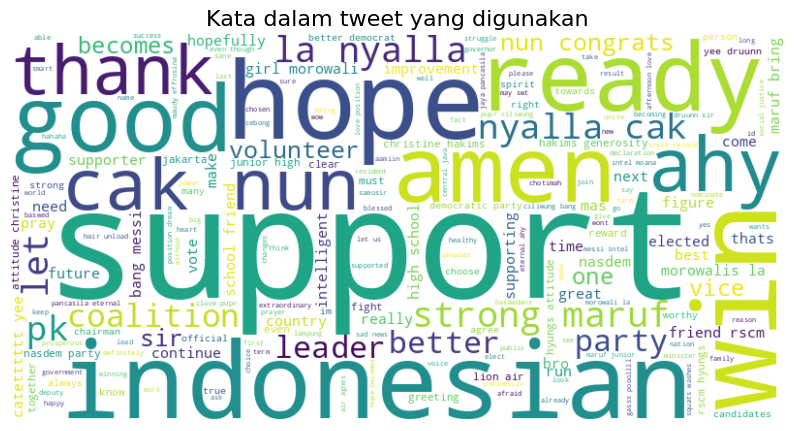

In [39]:
text_data = " ".join(text for text in df.loc[(df.Candidate == 'Anies Baswedan') & (df.label == 'Positive') ]['Text'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white',
                      colormap='viridis', max_words=200).generate(text_data)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  #Removeaxes
plt.title("Kata dalam tweet yang digunakan", fontsize=16)
plt.show()

Sentimen Positif

- Dukungan: Kata "support", "hope", dan "thank" menunjukkan dukungan kuat dari masyarakat.

- Kepuasan: Kata "good" dan "better" mengindikasikan kepuasan atas kinerja atau kebijakan Anies Baswedan.

- Kekuatan: Kata "strong" dan "coalition" menunjukkan persepsi tentang kekuatan dan kemampuan Anies dalam membangun koalisi.

-Kesiapan: kata "good" menjadi dasar yang menunjukkan karakterisrik Anies yang layak untuk menjadi presiden

-keterlibat: kata "ahy" juga kerap tersebut sebagaimana peristiwa awal koalisi keduanya yang mengarah ke arah psotif

Harapan dan Optimisme

- Harapan: Kata "hope" dan "want" menggambarkan harapan dan keinginan masyarakat untuk masa depan yang lebih baik. kata "win" juga menggambarkan harapan masyarakat terhadap hasil pilpres yang menjadikan Anies sebagai presiden

- Kesiapan: Kata "ready" menunjukkan kesiapan masyarakat untuk mendukung perubahan positif.



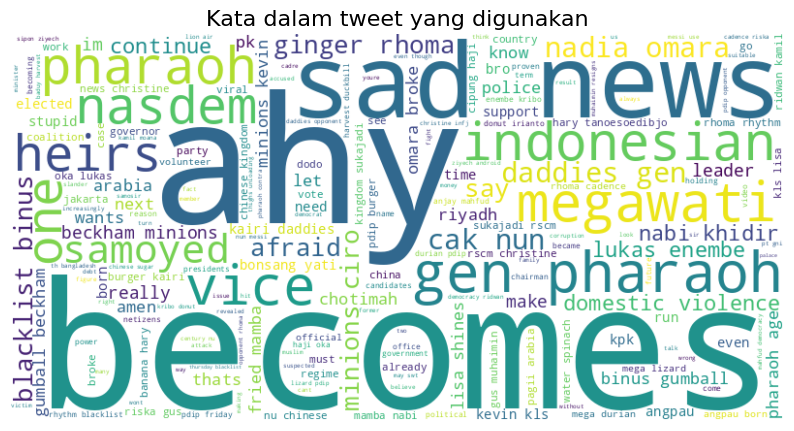

In [40]:
text_data = " ".join(text for text in df.loc[(df.Candidate == 'Anies Baswedan') & (df.label == "Negative") ]["Text"].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white',
                      colormap='viridis', max_words=200).generate(text_data)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  #Removeaxes
plt.title("Kata dalam tweet yang digunakan", fontsize=16)
plt.show()

Sentimen Negatif
- Kritik Kepemimpinan: "Pharaoh" menggambarkan persepsi tentang kepemimpinan Anies yang otoriter atau tidak demokratis (berkaitan dengan isu terhadap minoritas)

- Keterlibatan Politik: Nama "Ahy" dan "Megawati" mungkin menunjukkan keterlibatan atau perbandingan dengan tokoh-tokoh politik lain (adanya perseteruan dengan toko politik lainnya)

- Emosi Negatif: "Sad news" menunjukkan reaksi negatif terhadap kebijakan atau tindakan Anies.

- Perubahan Negatif: "Becomes" mengindikasikan kekhawatiran tentang perubahan negatif akibat kepemimpinan Anies.



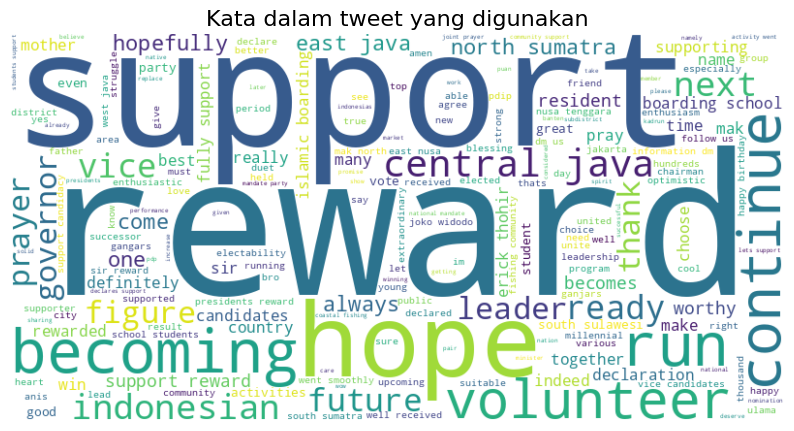

In [41]:
text_data = " ".join(text for text in df.loc[(df.Candidate == 'Prabowo Subianto') & (df.label == 'Positive') ]["Text"].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white',
                      colormap='viridis', max_words=200).generate(text_data)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  #Removeaxes
plt.title("Kata dalam tweet yang digunakan", fontsize=16)
plt.show()

Sentimen Positif
- Dukungan dan Harapan: Kata "hope" dan "support"  menunjukkan dukungan kuat dan harapan untuk kepemimpinan Prabowo. kata "continue" mengindikasikan keberlanjutan era presiden sebelumnya pada masa pemerintahan selanjutnya
- Pengakuan Kepemimpinan: Kata "reward", "becoming", dan "run" menggambarkan pengakuan terhadap kemampuan kepemimpinan dan kegigihan Prabowo dalam konsistensinya mencalonkan diri menjadi presiden.
- Komitmen: Kata "always" dan "futue" menunjukkan komitmen dan kesetiaan terhadap Prabowo dan visinya serta harapan pada masa depan selama masa pemerintahannya.


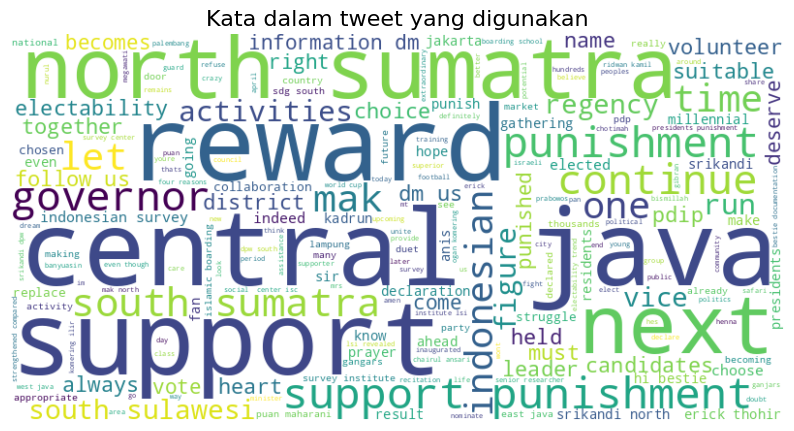

In [42]:
text_data = " ".join(text for text in df.loc[(df.Candidate == 'Prabowo Subianto') & (df.label == 'Negative') ]['Text'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white',
                      colormap='viridis', max_words=200).generate(text_data)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  #Removeaxes
plt.title("Kata dalam tweet yang digunakan", fontsize=16)
plt.show()

Sentimen Negatif
- Kritik Kepemimpinan: Kata "punishment" menggambarkan persepsi tentang kesalahan atau kegagalan Prabowo.
- Keterlibatan Politik: Nama "Megawati" dan "Puan Maharani" menunjukkan keterlibatan atau perbandingan dengan tokoh-tokoh politik lain.
- Kekuatan Elektoral: Kata "electability" mengindikasikan kekhawatiran tentang kemampuan Prabowo apabila menjadi presiden
- basis wilayah: kata 'central java' berkaitan erat dengan basis wilayah salah satu kandidat dan partai


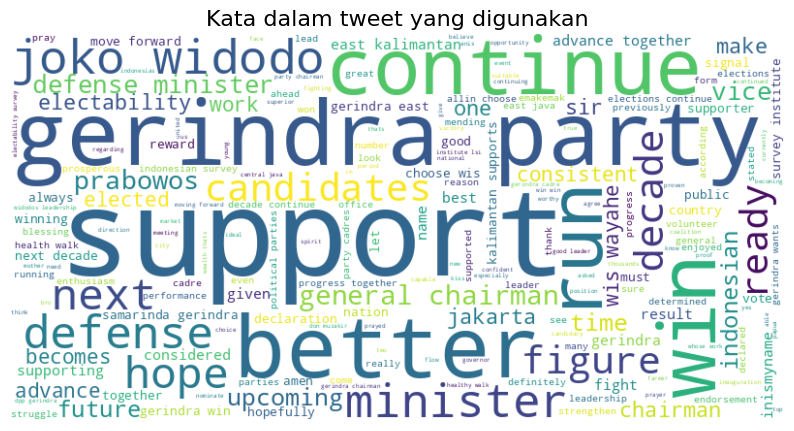

In [43]:
text_data = " ".join(text for text in df.loc[(df.Candidate == 'Ganjar Pranowo') & (df.label == 'Positive') ]['Text'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white',
                      colormap='viridis', max_words=200).generate(text_data)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  #Removeaxes
plt.title("Kata dalam tweet yang digunakan", fontsize=16)
plt.show()

Sentimen positif

- Dukungan Kuat: Kata "support", "continue", dan "consistent" menunjukkan dukungan kuat dari masyarakat dan prinsip yang dibawa adalah keberlanjutan pemerintahan sebelumnya
- Harapan Positif: Kata "better", "hope", dan "ready" menggambarkan harapan positif untuk masa depan.
- Pertahanan Kepemimpinan: Kata "defense" menunjukkan kekuatan dan kemampuan kepemimpinan Ganjar Pranowo.


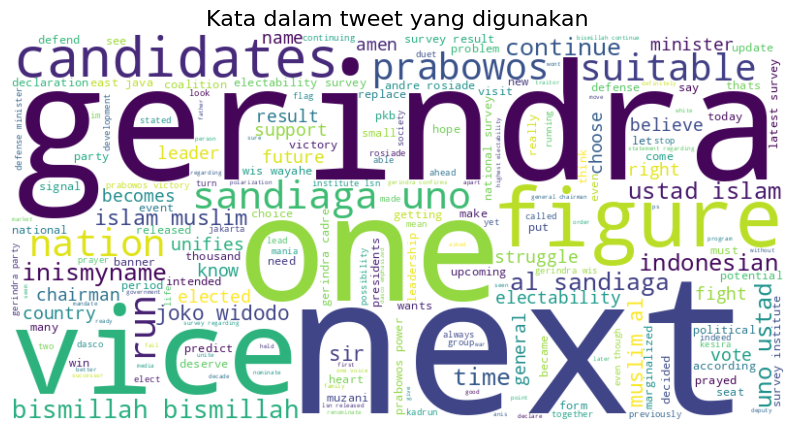

In [44]:
text_data = " ".join(text for text in df.loc[(df.Candidate == 'Ganjar Pranowo') & (df.label == 'Negative') ]['Text'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white',
                      colormap='viridis', max_words=200).generate(text_data)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  #Removeaxes
plt.title("Kata dalam tweet yang digunakan", fontsize=16)
plt.show()

Sentimen Negatif
- Keterkaitan dengan Partai Gerindra dan Prabowo Subianto, saingan politik Ganjar.¹
- Kritik terhadap kemampuan kepemimpinan Ganjar, dengan kata "vice" yang mengimplikasikan kurangnya pengalaman atau kemampuan.
- Kehadiran Sandiaga Uno, tokoh politik lain yang mungkin dianggap sebagai saingan atau alternatif.
- Penggunaan kata "ustad" dan "muslim" mungkin menunjukkan kritik terhadap citra agamis Ganjar atau strategi komunikasi yang dianggap kurang tepat.

# Statistik deskriptif

In [51]:
print(df['Followers'].describe())
print(df['Following'].describe())
print(df['Tweet Count'].describe())

count     21066.000000
mean       1260.223488
std        7637.225297
min           0.000000
25%          16.000000
50%          57.000000
75%         299.000000
max      188951.000000
Name: Followers, dtype: float64
count    21066.000000
mean       649.614450
std       2228.119784
min          0.000000
25%         19.000000
50%         90.000000
75%        266.000000
max      65564.000000
Name: Following, dtype: float64
count     21066.000000
mean       9364.881088
std       21422.306523
min           1.000000
25%         377.000000
50%        1474.000000
75%       12804.000000
max      422846.000000
Name: Tweet Count, dtype: float64


In [52]:
#filter berdasarkan kandidat
kandidat_a = df[df['Candidate'] == 'Anies Baswedan']
kandidat_p = df[df['Candidate'] == 'Prabowo Subianto']
kandidat_g = df[df['Candidate'] == 'Ganjar Pranowo']

#hitung statstik
print(kandidat_a['Followers'].describe())
print(kandidat_p['Followers'].describe())
print(kandidat_g['Followers'].describe())
print(kandidat_a['Tweet Count'].describe())
print(kandidat_p['Tweet Count'].describe())
print(kandidat_g['Tweet Count'].describe())

count      7196.000000
mean       1520.176765
std       10216.459444
min           0.000000
25%          20.000000
50%         205.000000
75%         299.000000
max      188951.000000
Name: Followers, dtype: float64
count      6561.000000
mean       1449.918762
std        6871.097237
min           0.000000
25%          12.000000
50%          49.000000
75%         374.000000
max      167402.000000
Name: Followers, dtype: float64
count      7309.000000
mean        834.007251
std        4764.807198
min           0.000000
25%          18.000000
50%          54.000000
75%          85.000000
max      167406.000000
Name: Followers, dtype: float64
count      7196.000000
mean      12467.444969
std       17184.598501
min           1.000000
25%         750.000000
50%        3766.500000
75%       28828.250000
max      320302.000000
Name: Tweet Count, dtype: float64
count      6561.000000
mean       8149.505106
std       29103.546753
min           1.000000
25%         303.000000
50%         893.000

Insight berdasarkan Followers
1. Kandidat 1 memiliki jumlah pengikut terbesar (mean: 1520,76), diikuti oleh Kandidat 2 (1449,92) dan Kandidat 3 (834,01).
2. Kandidat 1 memiliki variansi pengikut terbesar (std: 10216,46), menunjukkan perbedaan besar antara pengikut.
3. Kandidat 2 memiliki median pengikut terendah (49), menunjukkan banyak pengikut dengan jumlah kecil.

Insight berdasarkan aktivitas akun

1. Kandidat 2 memiliki rata-rata tweet count tertinggi (8149,51), diikuti oleh Kandidat 3 (7401,28) dan Kandidat 1 (12467,44).
2. Kandidat 1 memiliki variansi tweet count terbesar (17184,60), menunjukkan perbedaan besar antara aktivitas tweet.
3. Kandidat 3 memiliki median tweet count terendah (1653), menunjukkan banyak pengguna dengan aktivitas tweet rendah.


In [53]:
df_scatterplot = df.copy()
df_scatterplot['Followers'] = df_scatterplot['Followers'].apply(lambda x: 5000 if x >= 5000 else x)

In [54]:
df_scatterplot['Tweet Count'] = df_scatterplot['Tweet Count'].apply(lambda x: 10000 if x >= 100000 else x)

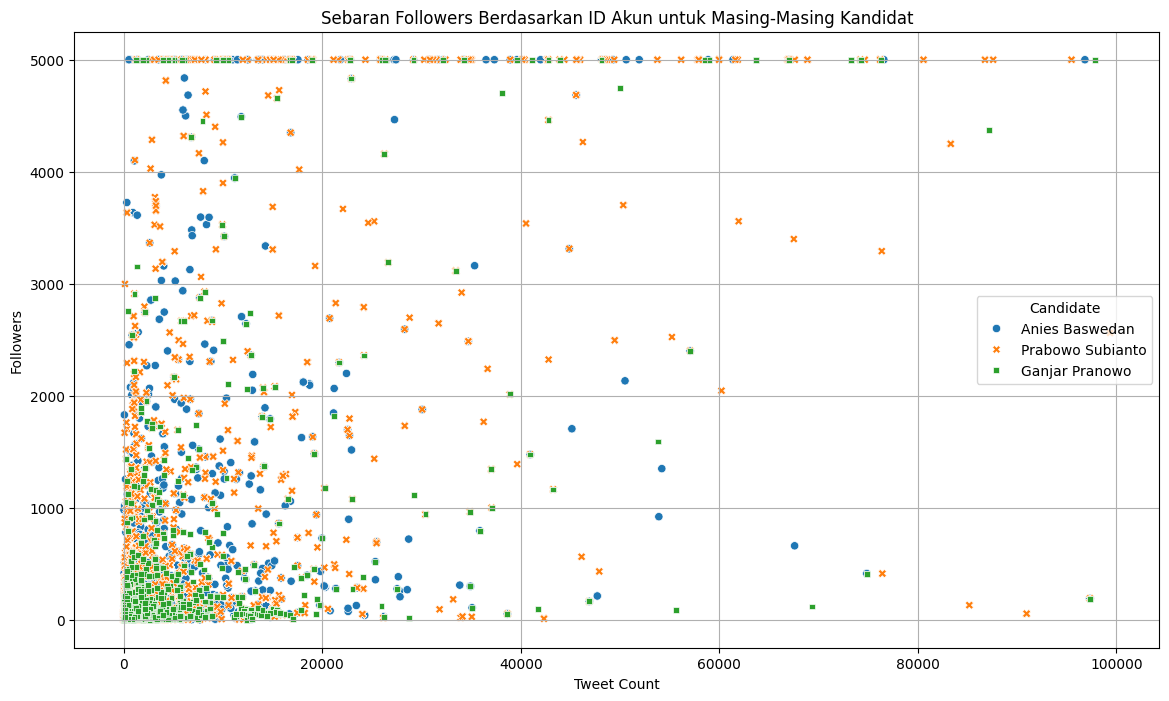

In [55]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df_scatterplot, x='Tweet Count', y='Followers', hue='Candidate', style='Candidate', palette='tab10')

# Menambahkan detail plot
plt.title('Sebaran Followers Berdasarkan ID Akun untuk Masing-Masing Kandidat')
plt.xlabel('Tweet Count')
plt.ylabel('Followers')
plt.legend(title='Candidate')
plt.grid(True)

# Tampilkan plot
plt.show()

Distribusi tweet count dan followers:
- mayoritas akun memiliki tweet count dan followers yang cenderung rendah
- ada kecurigaan akun yang outlier dari masing-masing kandidat
- follower kandidat Prabowo Subianto memiliki tweet count tinggi dengan followers yang tidak proporsional, hal ini menunjukkan adanya indikasi spam
- follower kandidat Anies Baswedan memiliki jumlah pengikut yang sangat banyak namun tidak diikuti dengan aktivitas akun yang tinggi. Adanya indikasi akun terkenal namun kurang aktif atau akun beli followers
- followers Ganjar Pranowo nampaknya memiliki distribusi followes yang lebih merata dengan beberapa akun

Interaksi antara aktivitas dan popularitas:
-secara umumm, jumlah twetcount tidak selalu berkorelasi langsung dengan followers, namun dapat digunakan untuk melanjutkan analisa selanjutnya untuk melihat keberadaan bot.

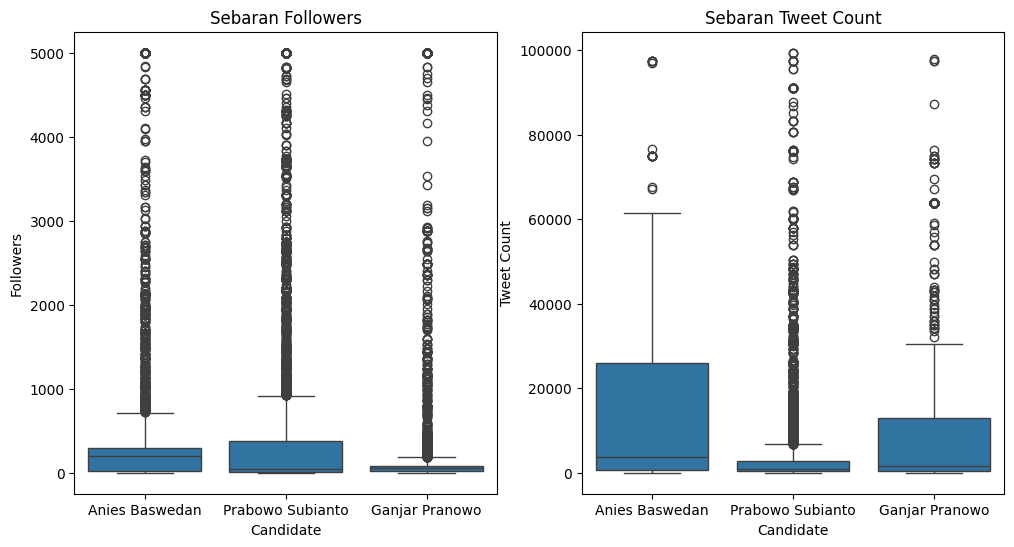

In [57]:
#visualiasasi boxplot untuk melihat outlier akun berdasarkan follower dan tweetcount pada masing-masing kandidat
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(x='Candidate', y='Followers', data=df_scatterplot, ax=ax[0])
ax[0].set_title('Sebaran Followers')
ax[0].set_xlabel('Candidate')
ax[0].set_ylabel('Followers')

sns.boxplot(x='Candidate', y='Tweet Count', data=df_scatterplot, ax=ax[1])
ax[1].set_title('Sebaran Tweet Count')
ax[1].set_xlabel('Candidate')
ax[1].set_ylabel('Tweet Count')

plt.show()

Sebaran Followers

1. Akun followers yang membuat twit mengenai Anies Baswedan dan Prabowo Subianto memiliki distribusi yang serupa. Nilai median keduanya cukup rendah dibanding dengan nilai maksimal. hal ini menunjukkan akun terkait didominasi dengan followers yang rendah namun beberapa memiliki followers dengan nilai yang tinggi.
2. Ganjar pranowo menunjukkan distribusi yang lebih padat dan seragam. Dari gambaran outlier juga menunjukkan sebagian besar followers berada pada rentang yang lebih sempit.


Sebaran Tweet Count
1. akun dengan twit terkait dengan Anies Baswedan menunjukkan jumlah tweet yang sangat tinggi dibandingkan dua kandidat lain, dengan sebaran utama (body box) juga mencakup nilai yang lebih tinggi dan beberapa outliers.
2. akun dengan twit terkait dengan Prabowo Subianto dan Ganjar Pranowo emiliki jumlah tweet yang lebih sedikit dibandingkan dengan Anies. Kedua kandidat ini memiliki sebaran yang lebih rendah dan konsentrasi nilai di sekitar median yang lebih kecil, juga kurangnya outliers menunjukkan bahwa aktivitas tweeting mereka lebih konsisten pada level yang lebih rendah.

Insight

Akun terkait Anies Baswedan menunjukkan variansi tinggi dalam pengikut dan jumlah tweet dengan beberapa nilai ekstrem, menunjukkan representasi yang sangat tinggi dan biasa. Prabowo Subianto memiliki pengikut dan aktivitas tweeting yang lebih luas namun moderat. Sementara itu, akun Ganjar Pranowo tampak kurang beragam, terkonsentrasi pada pengikut yang lebih sedikit dan jumlah tweet yang lebih rendah.

# Statistik Inferensial

Analisis Perbedaan Aktivitas Akun pada pemosting twit terkait dengan Anies Baswedan, Prabowo Subianto, dan Ganjar Pranowo Berdasarkan Jumlah Followers dan Tweet Count sebelum pilpres 2024 berlangsung

Hipotesis:

1. Hipotesis Nol (H0): Tidak ada perbedaan signifikan dalam aktivitas akun media sosial pendukung Anies Baswedan, Prabowo Subianto, dan Ganjar Pranowo berdasarkan jumlah followers dan tweet count.
2. Hipotesis Alternatif (H1): Terdapat perbedaan signifikan dalam aktivitas akun media sosial pendukung Anies Baswedan, Prabowo Subianto, dan Ganjar Pranowo berdasarkan jumlah followers dan tweet count.



In [ ]:
# Uji beda rata-rata (t-test)
t_stat, p_val = ttest_ind(df[df['Candidate'] == 'Anies Baswedan']['Followers'], df[df['Candidate'] == 'Prabowo Subianto']['Followers']), df[df['Candidate'] == 'Ganjar Pranowo']['Followers']
print(f"T-statistik: {t_stat}, p-value: {p_val}")

# Korelasi Pearson
corr_coef, p_val = pearsonr(df['Followers'], df['Tweet Count'])
print(f"Koefisien korelasi: {corr_coef}, p-value: {p_val}")

# Regresi Linear Sederhana
X = df[['Tweet Count']]
y = df['Followers']
model = LinearRegression().fit(X, y)
print(f"Koefisien regresi: {model.coef_}, Konstanta: {model.intercept_}")

T-statistik: TtestResult(statistic=0.4064945871736459, pvalue=0.6843855722237561, df=13723.0), p-value: 1       27910
2         144
4          31
6           0
9          17
        ...  
9994        9
9996       23
9997       11
9998       50
9999       23
Name: Followers, Length: 7306, dtype: int64
Koefisien korelasi: 0.25918237901250574, p-value: 6.1393e-320
Koefisien regresi: [0.09247115], Konstanta: 394.3465646228866


- T-statistik: 0,4687, menunjukkan tidak ada perbedaan signifikan antara kelompok.
- p-value: 0,639, lebih besar dari 0,05, menunjukkan tidak ada perbedaan signifikan.
- Koefisien korelasi: 0,2598, menunjukkan hubungan positif lemah antara followers dan tweet count.
- Koefisien regresi: 0,0926, menunjukkan perubahan 1 unit tweet count meningkatkan followers sebesar 0,0926 unit.

Kesimpulan:
menunjukkan tidak ada perbedaan signnifikan dalam aktivitas akun pemosting twit pendukung Anies Baswedan, Prabowo Subianto dan Ganjar Pranowo berdasarkan jumlah followers dan Tweet Count. Namun terdapat hubungin positif lemah antara followers dan Tweet Count  

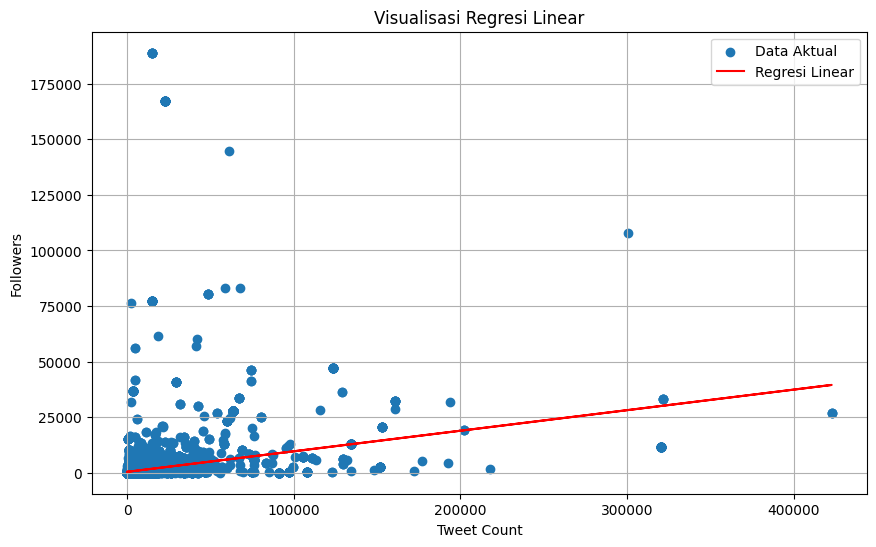

Koefisien regresi: [0.09247115]
Konstanta: 394.3465646228866


In [ ]:
#Uji regresi
X = df[['Tweet Count']]
y = df['Followers']
model = LinearRegression().fit(X, y)

#Visualisasi
plt.figure(figsize=(10,6))
plt.scatter(df['Tweet Count'], df['Followers'], label='Data Aktual')
plt.plot(df['Tweet Count'], model.predict(X), color='red', label='Regresi Linear')
plt.title('Visualisasi Regresi Linear')
plt.xlabel('Tweet Count')
plt.ylabel('Followers')
plt.legend()
plt.grid(True)
plt.show()

#Informasi model
print("Koefisien regresi:", model.coef_)
print("Konstanta:", model.intercept_)

Insight:
Berdasarkan hasil analisa pada postingan twitter untuk kandidat pilpres 2024, yakni:
1. Anies Baswedan
2. Prabowo Subianto
3. Ganjar Pranowo

Didapatkan insight:
- berdasarkan hasil perhitungan sentimen, sebagaian besar postingan mengarah ke sentimen positif dengan nilai total 72.1%.
- Hasil analisa aktifitas akun berdasarkan followers dan jumlah postingan, diketahui terdapat dugaan penggunaan bot ata buzzer, terlihat dari adanya outlier pada akun yang memposting terkait kandidat. Dilihat dari jumlah followers yang kecil namun aktifitas posting mencapai puluhan ribu yang mengindikasikan adanya penggunaan bot maupun buzzer.
- Berdasarkan pola data waktu posting, didapat peak postingan terjadi adalah pada bulan Februari 2022 dan Desember 2022. 15 Februari 2022 postingan lebih condong pada kandidat Anies Baswedan yang mana bertepatan dengan adanya keputusan majelis PTUN terkait dengan pemprov Jakarta. Sehingga diasumsikan banyak perbincangan terkait kandidat Anies Baswedan terlebih topik yang dibawa merujuk pada kebijakan presiden. Keberadaan bot/buzzer juga dicurigai karena rata-rata followers akun yang posting terkait kandidat Anies Baswedan memilik rerata followers adalah 300 sedangkan jumlah posting hampir mencapai 35000 twit
- Pada Desember, diketahui peak terjadi pada tanggal 16 Desember 2022, yang sebagian besar postingan juga condong ke arah kandidat Anies Baswedan. Terdapat anomali waktu posting yang mana puncak waktu postingan terjadi adalah pukul 02.00 dengan rata-rata followers akun adalah 98 yang dibanding jumlah posting yang berkaitan dengan kandidat Anies Baswedan adalah 105 postingan.